In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../../data/processed_data/full_df.csv')
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC
0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,137881.0,...,2.17,5.72,2.47,3.38,4.38,1.38,3.14,5.01,1.89,2.0
1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,449589.0,...,2.31,6.31,4.94,4.08,9.38,2.24,2.06,6.11,2.19,3.0
2,1,9,1009,AL,Blount County,2010,1.0,8929.7,787.0,155580.0,...,5.66,7.47,3.39,3.55,4.31,1.23,3.12,4.62,2.07,1.0
3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,2035.0,313874.0,...,3.73,6.46,2.70,4.00,3.78,1.55,2.96,3.06,2.24,3.0
4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,645.0,126516.0,...,1.88,4.71,3.84,2.78,6.30,2.41,1.38,3.71,2.03,4.0


In [3]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
with open("../Regression Analysis/factors.txt") as f:
     factors = f.read().splitlines()
with open("../Regression Analysis/outcomes.txt") as f:
     outcomes = f.read().splitlines()
df = df[identifying_fields + factors + outcomes]
print(df.shape[0])
df.dropna(inplace=True)
print(df.shape[0])
df.head()

6280
4492


,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,...,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate
844,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,41.5,...,3.39,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7
845,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,47.6,...,3.15,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2
846,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,39.1,...,4.53,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4
847,AL,Cherokee County,2011,0.661,0.107,0.401,-24413.0,38028.0,61.766667,38.3,...,3.81,4.66,1.86,8.76,1.10,5.78,5.82,6.0,4.4,38.4
848,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,37.1,...,3.76,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4


In [4]:
avg_temp = df['Average Temperature'].mean()
print(avg_temp)

56.493976328287324


In [5]:
med_temp = df['Average Temperature'].median()
print(med_temp)

55.824999999999996


In [6]:
AVG = True
temp_threshold = avg_temp if AVG else med_temp

In [7]:
def classify_temp_treatment(row):
    return 1 if row['Average Temperature'] >= temp_threshold else 0

In [8]:
df['temp_treated'] = df.apply(classify_temp_treatment, axis=1)
df.head()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,temp_treated
844,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,41.5,...,4.38,1.75,4.46,0.98,4.63,3.96,2.0,4.1,21.7,1
845,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,47.6,...,8.73,2.05,9.89,0.15,3.22,2.78,3.0,4.1,18.2,1
846,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,39.1,...,3.83,0.93,6.85,0.90,5.00,4.86,3.0,4.8,14.4,1
847,AL,Cherokee County,2011,0.661,0.107,0.401,-24413.0,38028.0,61.766667,38.3,...,4.66,1.86,8.76,1.10,5.78,5.82,6.0,4.4,38.4,1
848,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,37.1,...,5.03,1.51,10.39,0.75,5.95,6.09,4.0,4.8,17.4,1


In [9]:
df[df.temp_treated==0].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,March Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,temp_treated
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,...,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.0
mean,2013.439169,0.821078,0.080005,0.623584,3324.992372,53414.124205,50.108517,27.049597,28.727469,39.269012,...,3.375930,3.311348,3.444061,3.533412,2.935799,3.865409,2.671047,3.464773,17.344807,0.0
std,1.841126,0.086795,0.025019,0.098225,7918.973783,13293.496250,4.250190,7.370005,8.667881,7.332153,...,2.098468,2.581315,2.483394,2.656804,2.631435,3.153118,1.600563,0.621014,8.011286,0.0
min,2011.000000,0.281000,0.017000,0.332000,-99281.000000,27481.000000,24.250000,-20.000000,-0.500000,5.900000,...,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,1.000000,1.800000,4.300000,0.0
25%,2012.000000,0.774187,0.062854,0.557269,678.009520,43900.000000,47.712500,22.400000,23.900000,34.000000,...,1.900000,1.720000,1.770000,1.840000,1.250000,2.015000,1.000000,3.100000,12.000000,0.0
50%,2013.000000,0.834198,0.077000,0.623524,1639.311111,50774.000000,50.625000,27.000000,29.700000,39.400000,...,3.190000,2.960000,3.090000,3.240000,2.410000,3.490000,2.000000,3.400000,15.700000,0.0
75%,2015.000000,0.883000,0.094000,0.694458,4383.403226,59283.000000,53.262500,31.300000,34.600000,44.500000,...,4.605000,4.260000,4.665000,4.430000,3.615000,4.780000,4.000000,3.800000,20.550000,0.0
max,2016.000000,1.000000,0.197965,0.876040,89701.000000,122641.000000,56.491667,50.800000,50.800000,56.200000,...,15.790000,18.660000,20.790000,27.260000,24.650000,34.330000,9.000000,7.000000,98.500000,0.0


In [10]:
df[df.temp_treated==1].describe()

,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,January Average Temperature,February Average Temperature,March Average Temperature,...,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,temp_treated
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,...,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.0
mean,2013.511017,0.794334,0.083495,0.575660,6039.684121,48665.931552,63.556001,44.311158,47.222363,56.552321,...,4.364196,4.296221,3.823526,2.968575,3.071913,4.252982,2.390530,3.702625,17.037037,1.0
std,1.894372,0.093690,0.028571,0.095535,14265.261073,12251.269012,5.023131,8.340381,8.532286,7.155281,...,2.951458,3.297133,2.657424,2.681672,2.605467,2.950169,1.457929,0.680065,7.048393,0.0
min,2011.000000,0.185000,0.028399,0.307826,-99281.000000,27268.000000,56.500000,27.100000,25.200000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.800000,4.400000,1.0
25%,2012.000000,0.737987,0.063054,0.510321,917.480000,40552.000000,59.466667,38.100000,41.200000,51.300000,...,2.270000,2.040000,1.820000,1.040000,1.120000,1.850000,1.000000,3.200000,12.000000,1.0
50%,2013.000000,0.801928,0.079000,0.572912,2456.000000,45596.000000,62.500000,43.300000,46.700000,56.100000,...,4.170000,3.760000,3.460000,2.340000,2.330000,3.910000,2.000000,3.700000,15.800000,1.0
75%,2015.000000,0.863644,0.099000,0.640836,7111.600000,53580.000000,67.116667,49.400000,52.900000,61.400000,...,6.060000,5.920000,5.380000,4.030000,4.160000,5.970000,3.000000,4.100000,20.700000,1.0
max,2016.000000,1.000000,0.297000,0.883019,106755.000000,119075.000000,78.566667,72.500000,72.000000,75.500000,...,18.470000,22.950000,15.260000,18.780000,13.520000,18.300000,9.000000,7.000000,61.200000,1.0


<AxesSubplot:xlabel='RUCC', ylabel='Count'>

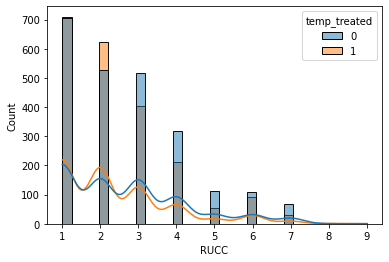

In [17]:
sns.histplot(data=df, x="RUCC", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Count'>

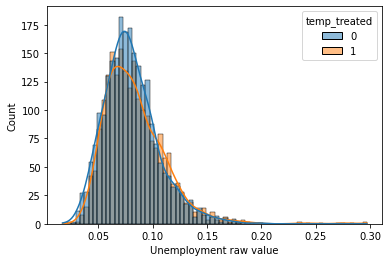

In [18]:
sns.histplot(data=df, x="Unemployment raw value", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='Median household income raw value', ylabel='Count'>

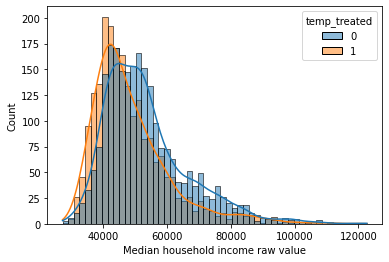

In [19]:
sns.histplot(data=df, x="Median household income raw value", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='High school graduation raw value', ylabel='Count'>

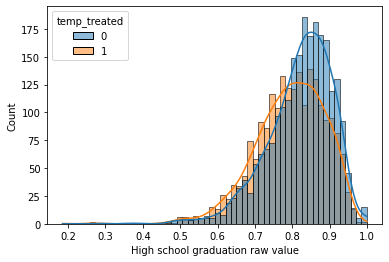

In [20]:
sns.histplot(data=df, x="High school graduation raw value", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='Some college raw value', ylabel='Count'>

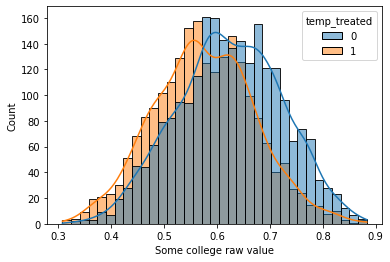

In [21]:
sns.histplot(data=df, x="Some college raw value", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='Poor mental health days raw value', ylabel='Count'>

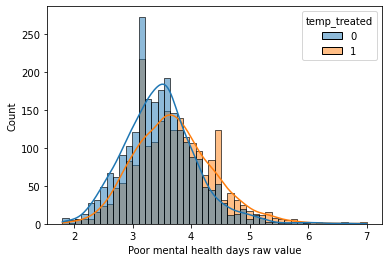

In [22]:
sns.histplot(data=df, x="Poor mental health days raw value", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='Crude Rate', ylabel='Count'>

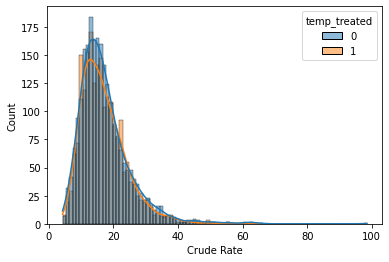

In [23]:
sns.histplot(data=df, x="Crude Rate", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='Ratio of population to mental health providers', ylabel='Count'>

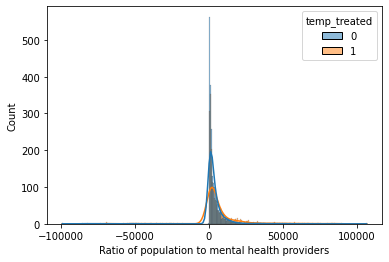

In [30]:
sns.histplot(data=df, x="Ratio of population to mental health providers", hue="temp_treated", kde=True)

<AxesSubplot:xlabel='Average Precipitation', ylabel='Count'>

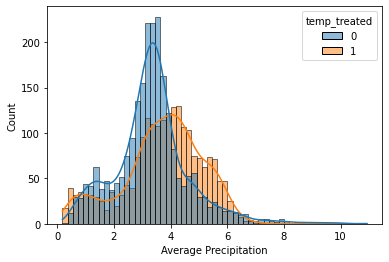

In [31]:
sns.histplot(data=df, x="Average Precipitation", hue="temp_treated", kde=True)

In [24]:
df.temp_treated.value_counts()

0    2359
1    2133
Name: temp_treated, dtype: int64

# Unadjusted ATE

In [25]:
# Unadjusted ATE - Poor mental health days
print('Difference in Sample Averages = {:0.3f}'.format(df[df.temp_treated== 1]['Poor mental health days raw value'].mean() - df[df.temp_treated== 0]['Poor mental health days raw value'].mean()))

Difference in Sample Averages = 0.238


In [26]:
# Unadjusted ATE - Suicide rate
print('Difference in Sample Averages = {:0.3f}'.format(df[df.temp_treated== 1]['Crude Rate'].mean() - df[df.temp_treated== 0]['Crude Rate'].mean()))

Difference in Sample Averages = -0.308


In [13]:
def OLS_estimate(outcome, covariates):
    covariates = sm.add_constant(covariates) # adding a constant 
    model = sm.OLS(outcome, covariates)
    result = model.fit()
    print(result.summary())

In [28]:
OLS_estimate(df['Poor mental health days raw value'], df['temp_treated'])

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.032
Model:                                           OLS   Adj. R-squared:                  0.032
Method:                                Least Squares   F-statistic:                     150.1
Date:                               Tue, 23 Nov 2021   Prob (F-statistic):           5.66e-34
Time:                                       23:47:33   Log-Likelihood:                -4435.9
No. Observations:                               4492   AIC:                             8876.
Df Residuals:                                   4490   BIC:                             8889.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                   coef    std err          t      P>|t|    

In [29]:
OLS_estimate(df['Crude Rate'], df['temp_treated'])

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.852
Date:                Tue, 23 Nov 2021   Prob (F-statistic):              0.174
Time:                        23:48:09   Log-Likelihood:                -15465.
No. Observations:                4492   AIC:                         3.093e+04
Df Residuals:                    4490   BIC:                         3.095e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.3448      0.156    111.295   

In [33]:
df.groupby('temp_treated')['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])

/var/folders/52/9bx80g11757dncrhv6pqh9f40000gn/T/ipykernel_99477/613593010.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('temp_treated')['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC'].agg(['mean'])


,Crude Rate,Poor mental health days raw value,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Precipitation,RUCC
,mean,mean,mean,mean,mean,mean,mean,mean,mean
temp_treated,,,,,,,,,
0,17.344807,3.464773,0.821078,0.080005,0.623584,3324.992372,53414.124205,3.350627,2.671047
1,17.037037,3.702625,0.794334,0.083495,0.575660,6039.684121,48665.931552,3.710176,2.390530


Counties that are hotter than average (temp_treated = 1) on average, have a worse ratio of population to mental health providers and lower median household income than counties that are cooler than average.

# Linear Regressions

In [14]:
# Linear Regressions accounting for control variables based on above analysis
outcome = df['Poor mental health days raw value']
covariates = df[['temp_treated', 'Average Precipitation', 'RUCC']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.103
Model:                                           OLS   Adj. R-squared:                  0.103
Method:                                Least Squares   F-statistic:                     172.6
Date:                               Thu, 02 Dec 2021   Prob (F-statistic):          6.96e-106
Time:                                       15:15:20   Log-Likelihood:                -4264.5
No. Observations:                               4492   AIC:                             8537.
Df Residuals:                                   4488   BIC:                             8563.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                            coef    std err          t      

In [15]:
outcome = df['Crude Rate']
covariates = df[['temp_treated', 'Average Precipitation', 'RUCC']]
OLS_estimate(outcome, covariates)

                            OLS Regression Results                            
Dep. Variable:             Crude Rate   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     784.2
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:16:22   Log-Likelihood:                -14520.
No. Observations:                4492   AIC:                         2.905e+04
Df Residuals:                    4488   BIC:                         2.907e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.95

Optimization terminated successfully.
         Current function value: 0.632332
         Iterations 5


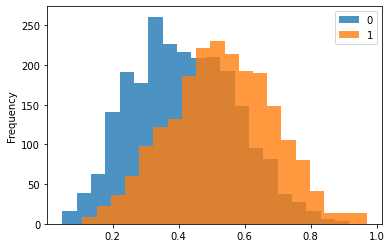

In [11]:
def gen_pscore(data, outcome, covariates):
    model = sm.Logit(outcome, covariates)
    result = model.fit()
    data['pscore'] = result.predict(covariates)
    data.groupby(['temp_treated']).pscore.plot(kind='hist', bins=20, alpha=0.8, legend=True)

gen_pscore(df, df['temp_treated'], df[['Crude Rate', 'Poor mental health days raw value', 'High school graduation raw value', 'Unemployment raw value', 'Some college raw value', 'Ratio of population to mental health providers', 'Median household income raw value', 'Average Precipitation', 'RUCC']])

In [12]:
def trim(data):
  control_data = data[data['temp_treated'] == 0]
  treat_data = data[data['temp_treated'] == 1]

  min_control, min_treat = control_data.pscore.min(), treat_data.pscore.min()
  max_control, max_treat = control_data.pscore.max(), treat_data.pscore.max()

  min_support = max(min_control, min_treat)
  max_support = min(max_control, max_treat)

  trim_data = data.loc[((data.pscore >= min_support) & (data.pscore <= max_support)),:]
  
  return trim_data

trim_df = trim(df)
trim_df.groupby(['temp_treated']).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
temp_treated,,,,,,,,
0,2335.0,0.420391,0.154054,0.107927,0.304746,0.411083,0.531373,0.916671
1,2116.0,0.525635,0.153589,0.107894,0.420632,0.527174,0.640028,0.912244


In [13]:
def Nearest_Neighbor_Pair(treated_df, non_treated_df):
    treated_x = treated_df['pscore'].values
    non_treated_x = non_treated_df['pscore'].values

    nbrs = NearestNeighbors(n_neighbors=1).fit(np.expand_dims(non_treated_x, axis= 1))
    distances, indices = nbrs.kneighbors(np.expand_dims(treated_x, axis= 1))
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

treated = trim_df[trim_df['temp_treated'] == 1]
non_treated = trim_df[trim_df['temp_treated'] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = -0.118


In [14]:
def compute_smd(covariates_table: pd.DataFrame, covariates: list, round_digits: int=4) -> pd.DataFrame:
    covariates_smds = []
    for var in covariates:
        covariates_values = covariates_table[var].values
        neg_mean = covariates_values[0, 0]
        neg_std = covariates_values[0, 1]
        pos_mean = covariates_values[1, 0]
        pos_std = covariates_values[1, 1]

        smd = (pos_mean - neg_mean) / np.sqrt((pos_std ** 2 + neg_std ** 2) / 2)
        smd = round(abs(smd), round_digits)
        covariates_smds.append(smd)

    return pd.DataFrame({'features': covariates, 'smd': covariates_smds})

covariates_list = ['Average Precipitation', 'RUCC']
agg_operations = {'temp_treated': 'count'}
agg_operations.update({
    covariate: ['mean', 'std'] for covariate in covariates_list
})

# Combine treated and matched_df
covariates_table = pd.concat([treated, matched_df]).groupby('temp_treated').agg(agg_operations)
covariates_table.head()

# standardize mean difference, <= 0.25
# Put both variables in there, unemployment/education balanced
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

                features     smd
0  Average Precipitation  0.0748
1                   RUCC  0.0367


In [15]:
def stratified_matching(data):
  mybins = np.arange(0.0, 1.1, 0.1)
  mylabels = np.arange(1, 11)
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)

  # calculate the weights for each strata
  strata_w = data[data['temp_treated'] == 1].groupby('strata').size()/data[data['temp_treated'] == 1].groupby('strata').size().sum()
  
  # calculate the ATT for each strata
  strata_ate = data[data['temp_treated'] == 1].groupby('strata')['Poor mental health days raw value'].mean() - data[data['temp_treated'] == 0].groupby('strata')['Poor mental health days raw value'].mean()

  # stratefied matching estimate 
  stratefied_ate = (strata_w * strata_ate).sum()  
  print("The stratification matching estimate is {}".format(round(stratefied_ate, 3))) 
  
stratified_matching(trim_df)

The stratification matching estimate is -0.091


/var/folders/52/9bx80g11757dncrhv6pqh9f40000gn/T/ipykernel_29096/354173698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


In [16]:
def IPW_estimator(data, T, Y, P):
  ITT = (data[T] * data[Y])/data[P] - ((1 - data[T])* data[Y])/(1 - data[P])
  IPWE = ITT.mean()
  return IPWE 

round(IPW_estimator(trim_df, 'temp_treated', 'Poor mental health days raw value' , 'pscore'), 3)

-0.035